**Nama Kelompok:**

**Alif Wira Bayu (221910814)**

**Denisa Hilmy Atiqah (221911050)**

**Dwi Joko Purnomo (221910685)**

**Latifa Rahmadani Jamal (221911099)**

**Riofebri Prasetia (221911192)**

Data yang digunakan adalah adult.data

deskripsi: Ekstraksi dilakukan oleh Barry Becker dari database Sensus 1994. Satu set catatan yang cukup bersih diekstraksi menggunakan kondisi berikut: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Tugas prediksi adalah menentukan apakah seseorang menghasilkan lebih dari 50 ribu setahun.

Import library yang diperlukan. Kemudian import data adult.data data yang digunakan ialah adult. data dimana data ini menentukan apakah seseorang menghasilkan lebih dari 50 ribu setahun.

Install Packages yang diperlukan

In [3]:
#Install dulu semua package berikut ini dengan function install.packages('')
install.packages('mlbench') #Package yang memiliki dataset- BreastCancer
install.packages('caTools') #Package memiliki fungsi split yang digunakan untuk membagi dataset kita menjadi data pelatihan dan pengujian.
install.packages('caret') #Package memiliki fungsi untuk melatih dan merencanakan model
install.packages('mice') #Package berfungsi untuk menangani missing data di dataset, termasuk dengan cara delete
install.packages('e1071') #Package untuk metode SVM
install.packages('ggplot2') #Package untuk membuat plot
install.packages('downloader') #Package untuk mengunduh file dari website
install.packages('dplyr') #Package untuk fungsi manipulasi data dalam bentuk dataframe
install.packages('tidyverse') #Package untuk beberapa fungsi pemodelan
install.packages('corrplot') #Package untuk membuat plot korelasi
install.packages('corrgram')
install.packages('ROCR')
install.packages('plotly')
install.packages('PerformanceAnalytics')
install.packages('lattice')
install.packages('psych')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("caTools"):
“installation of package ‘caTools’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("caret"):
“installation of package ‘caret’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib

In [4]:
#Install dulu semua package berikut ini dengan function install.packages()
library(mlbench) #Package yang memiliki dataset- BreastCancer
library(caTools) #Package memiliki fungsi split yang digunakan untuk membagi dataset kita menjadi data pelatihan dan pengujian.
library(caret) #Package memiliki fungsi untuk melatih dan merencanakan model
library(mice) #Package berfungsi untuk menangani missing data di dataset, termasuk dengan cara delete
library(e1071) #Package untuk metode SVM
library(ggplot2) #Package untuk membuat plot
library(downloader) #Package untuk mengunduh file dari website
library(dplyr) #Package untuk fungsi manipulasi data dalam bentuk dataframe
library(tidyverse) #Package untuk beberapa fungsi pemodelan
library(corrplot) #Package untuk membuat plot korelasi
library(corrgram)
library(ROCR)
library(plotly)
library(PerformanceAnalytics)
library(lattice)
library(psych)

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.4     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks mice::filter(), stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()

corrplot 0.90 loaded


Attaching package: ‘corrgram’


In [5]:
# nama atribut
header <- c("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary")

# unduh data dari url
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# baca data
data <- read.csv(url)
df <- read.csv(file = url, sep = ",", strip.white = TRUE, col.names = header)
head(df)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,salary
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


In [6]:
summary(df)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:32560       Min.   :  12285   Length:32560      
 1st Qu.:28.00   Class :character   1st Qu.: 117832   Class :character  
 Median :37.00   Mode  :character   Median : 178363   Mode  :character  
 Mean   :38.58                      Mean   : 189782                     
 3rd Qu.:48.00                      3rd Qu.: 237054                     
 Max.   :90.00                      Max.   :1484705                     
 education.num   marital.status      occupation        relationship      
 Min.   : 1.00   Length:32560       Length:32560       Length:32560      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

Karena data missing adalah cell dengan value "?", maka perlu diubah ke dalam bentuk NA

In [7]:
# ubah ? jadi NA
df[, 1:15][df[,1:15] == '?'] <- NA

In [8]:
View(df)

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,salary
<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [9]:
#cek missing data
sapply(df, function(x) sum(is.na(x)))

age      workclass         fnlwgt      education  education.num 
             0           1836              0              0              0 
marital.status     occupation   relationship           race            sex 
             0           1843              0              0              0 
  capital.gain   capital.loss hours.per.week native.country         salary 
             0              0              0            583              0

Menghilangkan instance yang null

In [10]:
# Hilangkan instance NULL
df2 <- drop_na(df)

#cek missing data dan strukturnya
sapply(df2, function(x) sum(is.na(x)))
summary(df2)

age      workclass         fnlwgt      education  education.num 
             0              0              0              0              0 
marital.status     occupation   relationship           race            sex 
             0              0              0              0              0 
  capital.gain   capital.loss hours.per.week native.country         salary 
             0              0              0              0              0

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:30161       Min.   :  13769   Length:30161      
 1st Qu.:28.00   Class :character   1st Qu.: 117628   Class :character  
 Median :37.00   Mode  :character   Median : 178429   Mode  :character  
 Mean   :38.44                      Mean   : 189798                     
 3rd Qu.:47.00                      3rd Qu.: 237630                     
 Max.   :90.00                      Max.   :1484705                     
 education.num   marital.status      occupation        relationship      
 Min.   : 1.00   Length:30161       Length:30161       Length:30161      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.12                                                           
 3rd Qu.:13.00                                                           
 Max.   :16.00                               

**Preprocessing, Menyiapkan data untuk analisis**

Kita akan menghapus kolom education karena sudah terwakili oleh education-num

In [11]:
df2 <- df2 %>% select(-education)
head(df2)

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,salary
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


Ubah data ke bentuk data frame

In [12]:
mydata <- data.frame(df2)
str(mydata)

'data.frame':	30161 obs. of  14 variables:
 $ age           : int  50 38 53 28 37 49 52 31 42 37 ...
 $ workclass     : chr  "Self-emp-not-inc" "Private" "Private" "Private" ...
 $ fnlwgt        : int  83311 215646 234721 338409 284582 160187 209642 45781 159449 280464 ...
 $ education.num : int  13 9 7 13 14 5 9 14 13 10 ...
 $ marital.status: chr  "Married-civ-spouse" "Divorced" "Married-civ-spouse" "Married-civ-spouse" ...
 $ occupation    : chr  "Exec-managerial" "Handlers-cleaners" "Handlers-cleaners" "Prof-specialty" ...
 $ relationship  : chr  "Husband" "Not-in-family" "Husband" "Wife" ...
 $ race          : chr  "White" "White" "Black" "Black" ...
 $ sex           : chr  "Male" "Male" "Male" "Female" ...
 $ capital.gain  : int  0 0 0 0 0 0 0 14084 5178 0 ...
 $ capital.loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week: int  13 40 40 40 40 16 45 50 40 80 ...
 $ native.country: chr  "United-States" "United-States" "United-States" "Cuba" ...
 $ salary        : chr  "<=50K" "<

Ubah data character menjadi numerik

In [13]:
# ubah character ke numerik
mydata2 <- as.data.frame(data.matrix(df2))
head(mydata2)

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,salary
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,50,5,83311,13,3,4,1,5,2,0,0,13,39,1
2,38,3,215646,9,1,6,2,5,2,0,0,40,39,1
3,53,3,234721,7,3,6,1,3,2,0,0,40,39,1
4,28,3,338409,13,3,10,6,3,1,0,0,40,5,1
5,37,3,284582,14,3,4,6,5,1,0,0,40,39,1
6,49,3,160187,5,4,8,2,3,1,0,0,16,23,1


Periksa apakah data imbalance

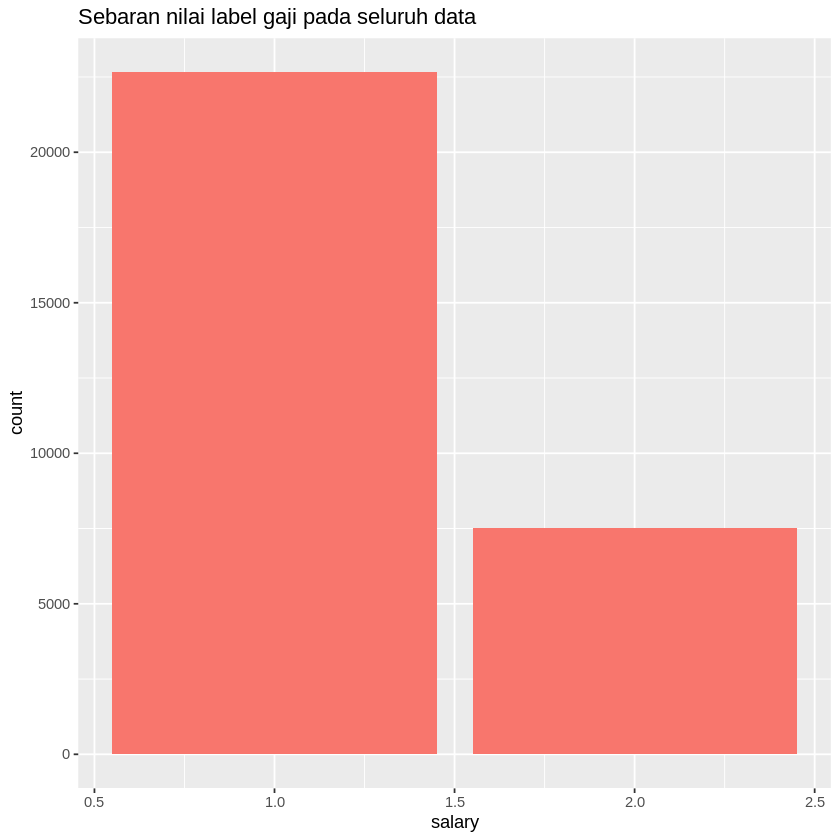

In [14]:
ggplot(mydata2, aes(x = salary)) + 
  geom_bar(aes(fill = "blue")) +
  ggtitle("Sebaran nilai label gaji pada seluruh data") +
  theme(legend.position = "none")

Di sini terlihat bahwa data imbalance, yaitu gaji <= 50 USD (kode 1) jumlahnya hampir 3x lipat dari gaji > 50 USD. Karena yang digunakan adalah metode K-Nearest Neighbor maka hal ini bisa diabaikan

**Memeriksa korelasi antar atribut**

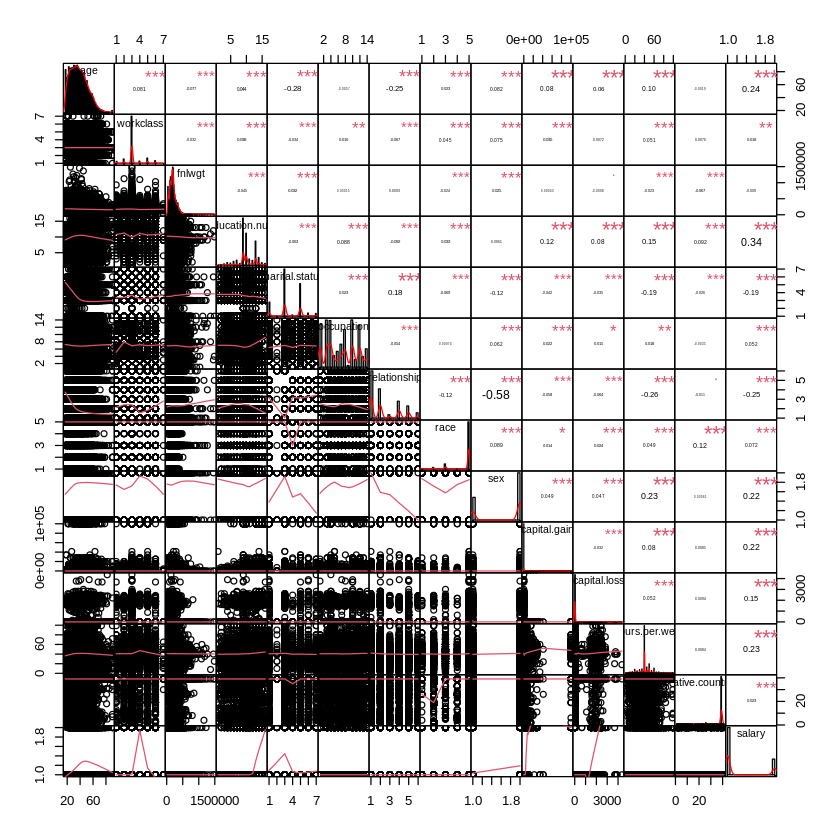

In [15]:
chart.Correlation(mydata2[, c(1:14)], histogram=TRUE, col="grey10", pch=1, main="Salary Means")

**Pemeriksaan sebaran nilai data pada tiap atribut/variabel untuk masing-masing kelas**
Dengan melihat apakah ada perbedaan sebaran nilai yang mencolok, kita bisa mendapatkan gambaran, atribut/variabel manakah yang secara umum kita duga bisa menjadi pembeda utama antara 2 kelas

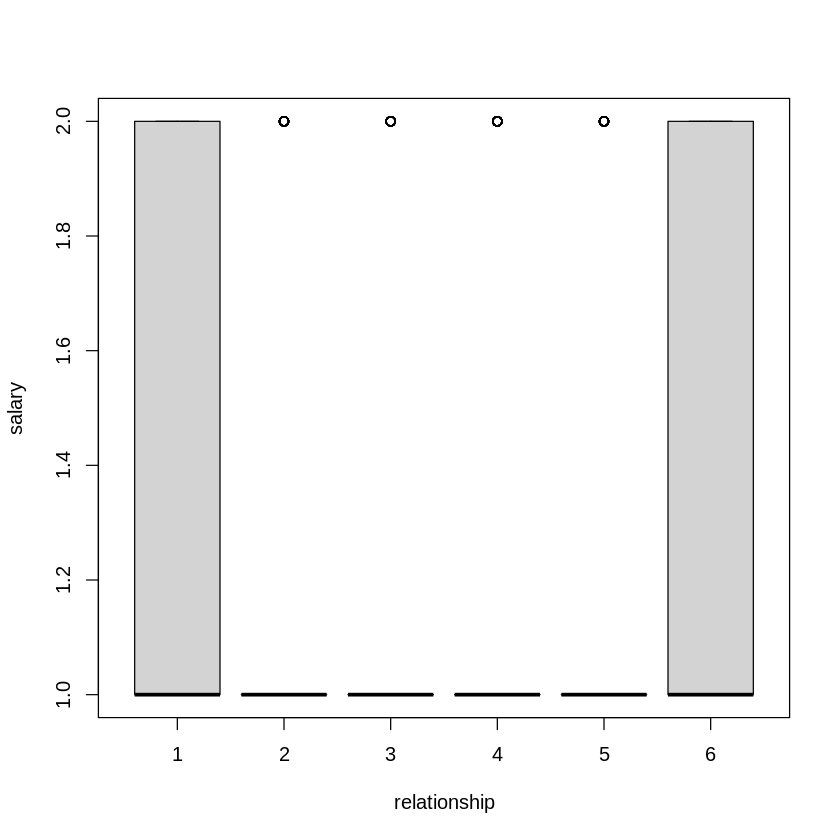

In [16]:
boxplot(salary~relationship, data = mydata2)

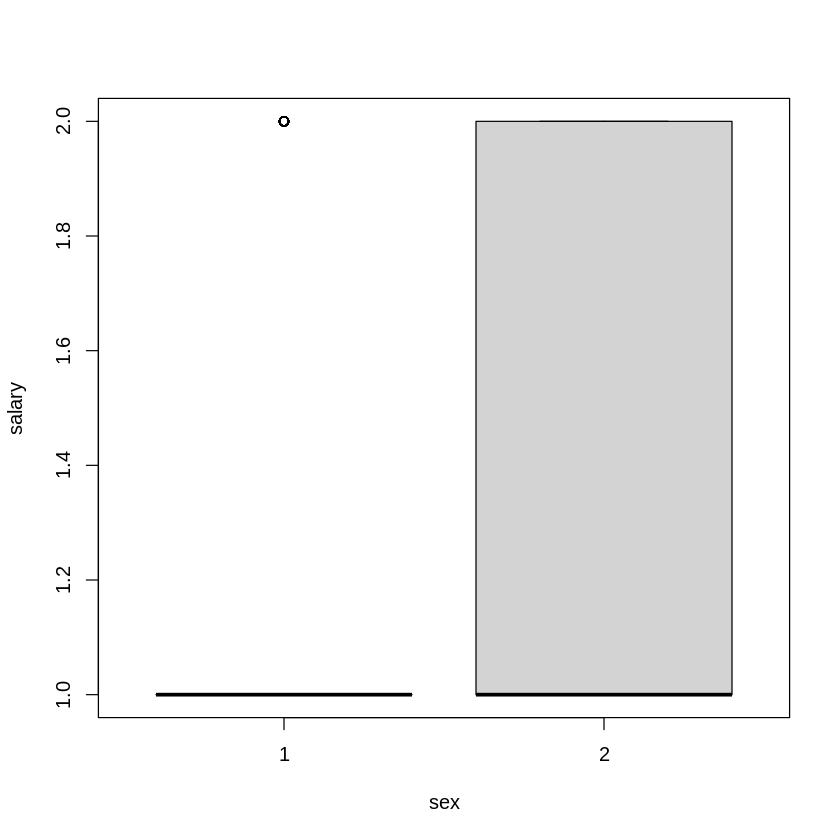

In [17]:
boxplot(salary~sex, data = mydata2)

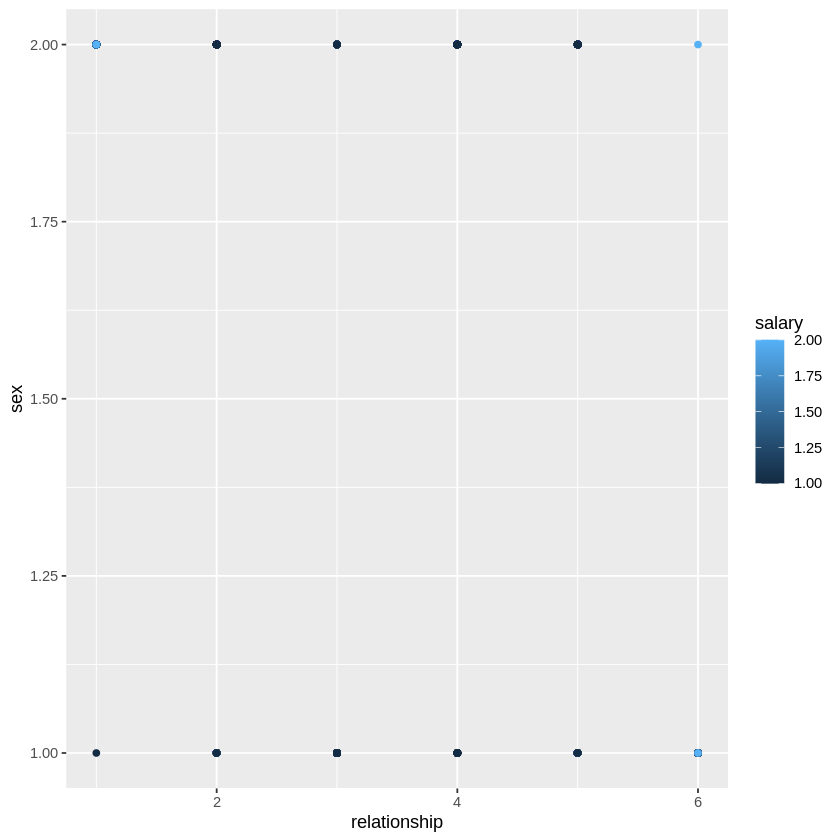

In [18]:
qplot(relationship, sex, data = mydata2, color = salary)

Lakukan transformasi

In [19]:
df_label = mydata2['salary']
mydata2 = as.data.frame(scale(mydata2))
mydata2['salary'] = df_label

head(mydata2)

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,salary
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.88026040,1.8879866,-1.0078920,1.1289422,-0.3872362,-0.7345967,-0.8857173,0.3850488,0.6928117,-0.1474349,-0.2185861,-2.33145621,0.2649243,1
2,-0.03333744,-0.2088802,0.2446547,-0.4396955,-1.7223335,-0.2382556,-0.2612492,0.3850488,0.6928117,-0.1474349,-0.2185861,-0.07773412,0.2649243,1
3,1.10865986,-0.2088802,0.4251990,-1.2240143,-0.3872362,-0.2382556,-0.8857173,-2.0109607,0.6928117,-0.1474349,-0.2185861,-0.07773412,0.2649243,1
4,-0.79466898,-0.2088802,1.4066028,1.1289422,-0.3872362,0.7544266,2.2366230,-2.0109607,-1.4433458,-0.1474349,-0.2185861,-0.07773412,-5.3038557,1
5,-0.10947059,-0.2088802,0.8971319,1.5211017,-0.3872362,-0.7345967,2.2366230,0.3850488,-1.4433458,-0.1474349,-0.2185861,-0.07773412,0.2649243,1
6,0.80412725,-0.2088802,-0.2802630,-2.0083332,0.2803124,0.2580855,-0.2612492,-2.0109607,-1.4433458,-0.1474349,-0.2185861,-2.08104264,-2.3556781,1


Lakukan training

In [20]:
ran <- sample(1:nrow(mydata2), 0.33 * nrow(mydata2))
ran

[1] 14453 22860  7951 10576 15233 27400 10777 12477 24776  3345  9947  2213
  [13]  3078  5044    81 17851  5809  6569 13251 21785 20327 26651  1776 14315
  [25] 23451  9696 26295  9050    23  6686  4634  8301  8270 17055 21278 27695
  [37] 11633 24341 11215 29528 12921  9658 18679  7453  9198 22319  7545 27552
  [49] 14225 10697  2843  9528 27259  2264 13969 25501 27301 29770  6443 28268
  [61]  3899 23596 28702 21792 21840 27278 21884 20966 12812 13376 18851  9477
  [73] 14217 21231 16922 10257 18727  2991  3406 21178  3945 18163 21183 25086
  [85] 24714 29621 22360 13654 26499 13804 11330 16443 18754  5802 28361  5470
  [97] 24020 19462  1613 10360 13594 28846 15563 27921 16061 13049  3869 24598
 [109] 18414  2069 10094 15650 29322 29671 10064 26563 24931 14533  6082 17818
 [121] 16646 18081  3409 18059  8027 29973 19153 14023 16253 23333  9796 28816
 [133]  7737 28584  2826 27957 20830 27699 13372 20592  6193 18913 22737 16902
 [145] 19971 24272 24637 25417 15471 17553 11675 27523 18542 11912 17269 20495
 [157] 19396    42 13278  1800  6065 15639  7040  9559 12844  7550 15211 29461
 [169] 11848 19529 23841 16324  7214  4261  2067 11005 22049 20015 11933 28023
 [181] 14778 18698 27797  7952 18953 11023 18022 23761 16311 17477   608  7809
 [193] 27428 26440 26416  7252 20694 25340 26571 21434 29376 27465 29271  5299
 [205] 15537  2022  2512  5885 13707 22955 16833  5001 15408 24678 21515 16538
 [217]  1951 11535  4744 13050 24880   153 16636  6932  9228  4193 23243 12050
 [229] 20646  2755 22459  8843 23119 18446 11751 25135 19026 16679 11231 29398
 [241]   627 27736 24804 21832 24912 29931 26675 18563  1480   224 15667  1371
 [253] 19437  6032 14398 28469 15616  4307 21724 17182 20018 14811  9631 25943
 [265] 12683 24459 25816 11612 18641 15934   932 24086 13046 13439  9614  1923
 [277] 25833  5374  4064 15604  3243 12909  8782 20864 14635  7610 20631  1129
 [289]  4239  2345 20024 23122 16531  6062  4437  8537  8331 29429  2175 11450
 [301]  6566 28375 24066 14911 19184 26528  6591 26045 27280 20402 25186 24262
 [313]  1922 23806 17540  7738 30073  2428 26092  2028 13356 28760 18461  2270
 [325] 27989 19742 12970 12434  5879 17489  3880  9902  8689  3592 29072 15805
 [337] 11641 25819 24764  4903  3120 14948 26157 13482 12609  3527 23753 13662
 [349] 10974  2525  4875 17974 17689 23975 24686 27898  9697 29870  5448  2552
 [361] 16252  4314 15935 18595 13494 15210 27170 14777  8206  5234  6887 23362
 [373] 18598  4902 13418 11313 16004  5803 16040   230 16327 23801 28905  7111
 [385]  3513 24874  8813 23214 17790 28532  6101 19015 10786  6439 18270 14542
 [397] 17568 10245 26886 29087 22477 23595 19869 28360  9810 18139 12439 14599
 [409]  8255 25309  9369 24935 11136   510   938 13336 12311 22847  9402 24783
 [421]  7084 19613 26351   701 17205 11982 12381 28166  7911 27845 22678 18930
 [433] 13692  5763 16655 29471 13680 27941 17397  2856 19886 20162 15965 27219
 [445] 17812 24026  1273 18180 16934 10221 10744 14488 25252 17934 22885 28405
 [457] 26975   310  3066 15967 29683 23360  1297 25987 27642 13610  5200 19329
 [469] 22151  8159 22190 11025 11160  6131  1183 15662  9251 23127 28595  3521
 [481] 20870 23892  1080 13429  5766  7213 12821 17843 10621  6668 15625 14047
 [493] 21399 28953  2957 19180  8358 12286  1610 11884 23959 11564 27324  9709
 [505] 18299   683  3204  2328 23142 18190 29160 23261  8565 20275  3389 21441
 [517]  8344  1688  2101 19476  5031 25368 15942 24999  1358  4140   773 24629
 [529] 13255 13156 10711   490 11984  5089 16140 28751  7893 17737 20571  3690
 [541] 19653 26383  4809 12358 24393 10944 23551 18234 17519  6849  7524 19766
 [553]  7231 16718   252 19304 21824 24296 11078    38 12653 23474 28963 23794
 [565] 20164 10996  7399 25671  8661 29494 13578 18878  4758 13089 12604 17252
 [577]  4569 23061  3590   126 12310 21745 22309 19624  8202  6877 22352  9623
 [589] 28410 14289 18565 27850 24924  9397   583  6723 14176  2984 20991  2943
 [601]  8823 23921 10521 21483 28873  3097 17359 2710

In [21]:
X_train = mydata2[-ran,]
X_test = mydata2[ran,]
y_train = mydata2[-ran, 14]
y_test = mydata2[ran, 14]

Buat Model K-NN

In [24]:
library(class)

#jalankan knn function
pr <- knn(X_train, X_test, cl = y_train, k = 8)

#buat confusion matrix
tab <- table(pr, y_test)

accuracy <- function(x){sum(diag(x)/(sum(rowSums(x))))*100}
accuracy(tab)

tab

[1] 96.08158

   y_test
pr     1    2
  1 7381  312
  2   78 2182

dalam hal ini didapat hasil ada sebanyak 7381 diprediksi sama dengan jumlah sebenarnya dengan pendapatannya sebesar <= 50 dollars dengan tingkat akurasi 96,08% dengan menggunakan parameter k = 8 pada K-NN

**Mencoba dengan parameter k yang lain dari k = 3 sampai k = 10**

dalam hal ini kita mencoba mencari k dengan akurasi yang besar

In [34]:
y = as.vector(mydata2['salary'])
x = as.matrix(mydata2[,-14])

kf = knn.cv(train = mydata2, cl = mydata2[,14],k = c(3:10))

Warning message in if (ntr - 1 < k) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (k < 1) stop(gettextf("k = %d must be at least 1", k), domain = NA):
“the condition has length > 1 and only the first element will be used”


In [35]:
levels(kf) = levels(as.factor(mydata2[,14]))
tb = table(kf, as.factor(mydata2[,14]))

print(tb)
print(accuracy(tb))

   
kf      1     2
  1 22430   600
  2   223  6908
[1] 97.27131


dalam hal ini antara k = 3 sampai k = 10 didapat hasil akurasi yang besar dibanding sebelumnya yaitu sebesar 97,27%